<a href="https://colab.research.google.com/github/niladribanerjee80/DSA-Class/blob/main/Class_2_DLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import graphviz

class Node:
    def __init__(self,value):
        self.value = value
        self.next = None
        self.prev = None

class DoubleLinkedList:
    def __init__(self,value):
        new_node = Node(value)
        self.head = new_node
        self.tail = new_node
        self.length = 1

    def print_list(self,msg="Print DLL"):
        print("--------")
        print(msg)
        print("--------")
        if self.length == 0:
            return "Nothing to display"
        temp = self.head
        next_list = []
        prev_list = []
        while temp is not None:
            next_list.append(temp.value)
            if temp.prev:
                prev_list.append(temp.prev.value)
            temp = temp.next
        if next_list[:-1] == prev_list:
            result = ""
            for index,item in enumerate(next_list):
                if index == 0:
                    result = str(item)
                else:
                    result = result + "<->" + str(item)
            print(result)
        else:
            print("DLL is not formed correctly")

    def print_graph(self,msg="Graph DLL"):
        print("--------")
        print(msg)
        print("--------")
        dot = graphviz.Digraph()
        dot.attr(rankdir="LR")
        temp = self.head
        index = 0
        while temp is not None:
            label = f"{temp.value} (index={index})"
            if self.length == 1:
                dot.node(str(temp.value),label,fillcolor="chartreuse",style="filled")
            else:
                if temp == self.head:
                    dot.node(str(temp.value),label,fillcolor="aquamarine",style="filled")
                elif temp == self.tail:
                    dot.node(str(temp.value),label,fillcolor="cyan",style="filled")
                else:
                    dot.node(str(temp.value),label)
            if temp.next:
                dot.edge(str(temp.value),str(temp.next.value))
            if temp.prev:
                dot.edge(str(temp.value),str(temp.prev.value))
            temp = temp.next
            index += 1
        dot.edge("Start", str(self.head.value),dir="back")
        dot.edge(str(self.tail.value), "End")
        return dot

    def append(self,value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        return True

    def pop(self):
        if self.length == 0:
            return None
        popped_node = self.tail
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        popped_node.prev = None
        self.length -= 1
        return popped_node

    def make_empty(self):
        self.head = None
        self.tail = None
        self.length = 0

    def prepend(self,value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
        self.length += 1
        return True

    def pop_first(self):
        if self.length == 0:
            return None
        popped_node = self.head
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            self.head = self.head.next
            self.head.prev = None
        popped_node.next = None
        self.length -= 1
        return popped_node

    def get(self,index):
        if self.length == 0:
            return None
        if index < 0 or index >= self.length:
            return None
        if index < (self.length/2):
            temp = self.head
            for _ in range(index):
                temp = temp.next
        else:
            temp = self.tail
            for _ in range(self.length-1,index,-1):
                temp = temp.prev
        return temp

    def set_value(self,index,value):
        temp = self.get(index)
        if temp:
            temp.value = value
            return True
        else:
            return False

    def insert(self,index,value):
        if index < 0 or index > self.length:
            return False
        elif index == 0:
            return self.prepend(value)
        elif index == self.length:
            return self.append(value)
        else:
            new_node = Node(value)
            curr_node = self.get(index)
            prev_node = curr_node.prev
            if curr_node:
                if prev_node:
                    prev_node.next = new_node
                new_node.prev = prev_node
                new_node.next = curr_node
                curr_node.prev = new_node
        self.length += 1
        return True

    def remove(self,index):
        if index < 0 or index >= self.length:
            return False
        elif index == 0:
            return self.pop_first()
        elif index == self.length:
            return self.pop()
        else:
            curr = self.get(index)
            prev = curr.prev
            next = curr.next

            prev.next = next
            next.prev = prev

            curr.prev = None
            curr.next = None
        self.length -= 1
        return curr

--------
Graph DLL
--------


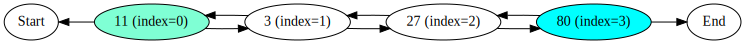

In [4]:
dll = DoubleLinkedList(11)
dll.append(3)
dll.append(27)
dll.append(80)
dll.print_graph()

--------
Graph DLL
--------


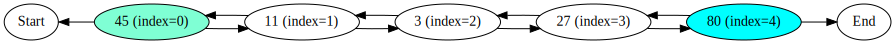

In [5]:
dll.prepend(45)
dll.print_graph()

Pop First Node =  45
--------
Graph DLL
--------


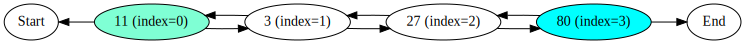

In [7]:
pop_first_node = dll.pop_first()
print("Pop First Node = ",pop_first_node.value)
dll.print_graph()

Pop Node =  80
--------
Graph DLL
--------


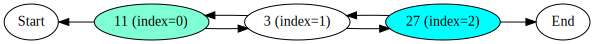

In [8]:
pop_node = dll.pop()
print("Pop Node = ",pop_node.value)
dll.print_graph()

--------
Graph DLL
--------


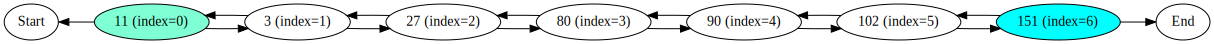

In [10]:
dll = DoubleLinkedList(11)
dll.append(3)
dll.append(27)
dll.append(80)
dll.append(90)
dll.append(102)
dll.append(151)
dll.print_graph()

In [14]:
node_0 = dll.get(0)
print("node_2 = ",node_0.value)

node_2 = dll.get(2)
print("node_2 = ",node_2.value)

node_4 = dll.get(4)
print("node_4 = ",node_4.value)

node_6 = dll.get(6)
print("node_4 = ",node_6.value)

node_11 = dll.get(11)
if node_11:
    print("node_11 = ",node_11.value)
else:
    print("node_11 = None")

node_2 =  11
node_2 =  27
node_4 =  90
node_4 =  151
node_11 = None


--------
Graph DLL
--------


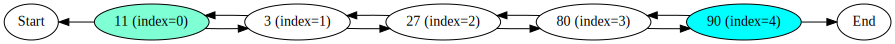

In [18]:
dll = DoubleLinkedList(11)
dll.append(3)
dll.append(27)
dll.append(80)
dll.append(90)
dll.print_graph()

--------
Graph DLL
--------


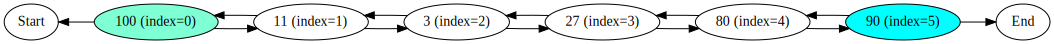

In [19]:
dll.insert(0,100)
dll.print_graph()

In [28]:
def dll_fill():
    dll = DoubleLinkedList(11)
    dll.append(3)
    dll.append(27)
    dll.append(80)
    dll.append(90)
    return dll

--------
Graph DLL
--------


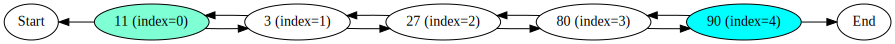

In [33]:
dll = dll_fill()
dll.print_graph()

--------
Graph DLL
--------


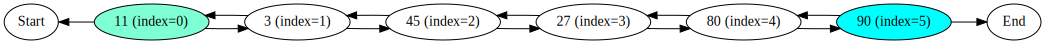

In [34]:
dll.insert(2,45)
dll.print_graph()

--------
Graph DLL
--------


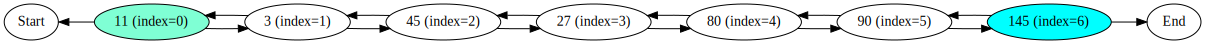

In [35]:
dll.insert(6,145)
dll.print_graph()

--------
Graph DLL
--------


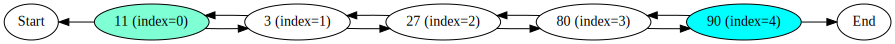

In [39]:
dll = dll_fill()
dll.print_graph()

--------
Graph DLL
--------


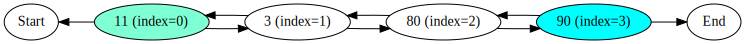

In [40]:
node_2 = dll.remove(2)
dll.print_graph()